In [1]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [2]:
from obspy.core import read

In [3]:
st = obspy.read('/Users/akashbhullar/pysep/20090407201255351/20090407201255351.YV.BLAK..BH.z')

In [4]:
st

1 Trace(s) in Stream:
YV.BLAK..BHZ | 2009-04-07T20:11:15.360003Z - 2009-04-07T20:17:55.300003Z | 50.0 Hz, 19998 samples

In [5]:
st[0]

YV.BLAK..BHZ | 2009-04-07T20:11:15.360003Z - 2009-04-07T20:17:55.300003Z | 50.0 Hz, 19998 samples

In [6]:
len(st)

1

In [7]:
len(st[0])

19998

In [8]:
st[0].stats.endtime

2009-04-07T20:17:55.300003Z

In [9]:
st[0].stats.starttime

2009-04-07T20:11:15.360003Z

In [10]:
st[0].stats.endtime-st[0].stats.starttime

399.94

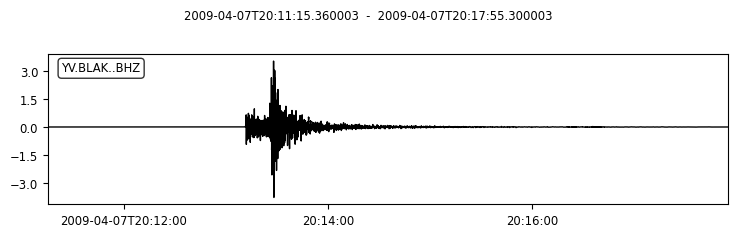

In [11]:
st[0].plot();

In [13]:
tr=st[0]

In [14]:
tr.times("matplotlib")

array([ 14341.84115   ,  14341.84115023,  14341.84115046, ...,
        14341.84577847,  14341.8457787 ,  14341.84577894])

In [15]:
tr.data

array([ -1.23322102e-13,  -1.64092333e-11,  -7.26591357e-11, ...,
         5.62513022e-11,   2.17120957e-11,   5.99753493e-12], dtype=float32)

In [16]:
arr = tr.data

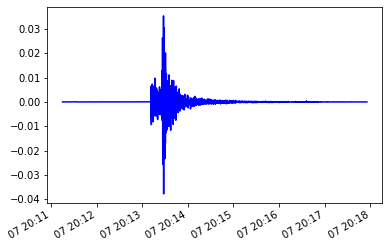

In [17]:
tr = st[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

/var/folders/l5/ybfh5svn73n9lfhx0b1t0km40000gn/T/ipykernel_2521/2122566741.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq,psd,LineWidth=2)
No handles with labels found to put in legend.


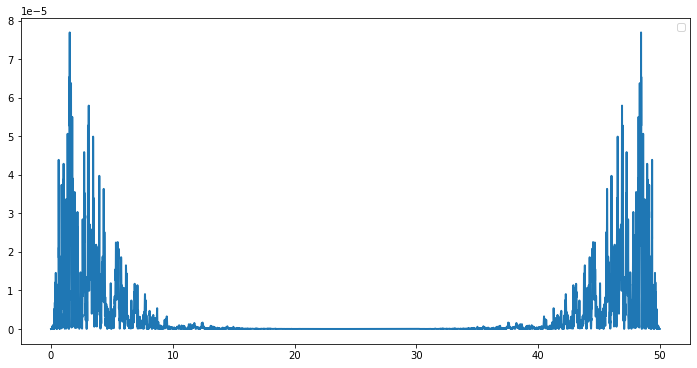

In [30]:
length = len(tr.data)
fastFT = np.fft.fft(arr,length)
psd = (fastFT.real * fastFT.real + np.conj(fastFT).imag * np.conj(fastFT).imag)/length
freq = (1/(0.02*length)) * np.arange(length)
L = np.arange(0,length)

plt.figure(figsize=(12,6))
plt.plot(freq,psd,LineWidth=2)
plt.legend()
plt.show()

In [80]:
np.conj(fastFT)

array([ -6.96322522e-04-0.j        ,  -1.91740380e-04-0.00048147j,
         1.64573445e-05-0.00032233j, ...,   4.63574652e-04-0.00157685j,
         1.64573445e-05+0.00032233j,  -1.91740380e-04+0.00048147j])

In [83]:
str(fastFT[2])

(1.6457344538688481e-05+0.00032232951201473237j)

In [76]:
np.multiply(fastFT,np.conj(fastFT))

array([  4.84865055e-07+0.j,   2.68578730e-07+0.j,   1.04167159e-07+0.j,
       ...,   2.70134787e-06+0.j,   1.04167159e-07+0.j,
         2.68578730e-07+0.j])

In [31]:
freq

array([  0.00000000e+00,   2.50025003e-03,   5.00050005e-03, ...,
         4.99924992e+01,   4.99949995e+01,   4.99974997e+01])

In [43]:
np.arange(length)

array([    0,     1,     2, ..., 19995, 19996, 19997])

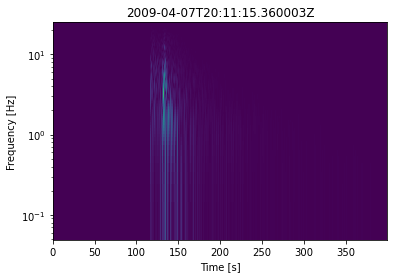

[None]

In [60]:
st.spectrogram(log=True, samp_rate=50, wlen=1, per_lap = 0.90, title=str(st[0].stats.starttime))

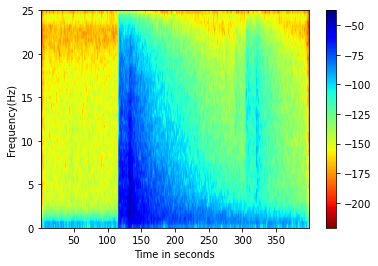

In [51]:
plt.specgram(tr.data,NFFT=120, Fs=50,
    noverlap=100,
    cmap='jet_r')
plt.xlabel('Time in seconds')
plt.ylabel('Frequency(Hz)')

plt.colorbar()
plt.show()